# Auto-Encoder Network:

An Auto-Encoder (AE) is a type of neural network used for unsupervised learning, mainly for dimensionality reduction, feature extraction, anomaly detection, and data compression. It consists of two main parts:

1. Encoder: Compresses the input into a lower-dimensional latent space representation.
2. Decoder: Reconstructs the input from the compressed representation.

Auto-encoders are trained using reconstruction loss to minimize the difference between input and output.

## Use Cases of Auto-Encoders

1. Dimensionality Reduction (alternative to PCA)
2. Anomaly Detection (fraud detection, network security, fault detection)
3. Denoising (removing noise from images and signals)
4. Image Generation (e.g., Variational Autoencoders for synthetic image generation)
5. Feature Extraction (finding latent patterns)
6. Customer Segmentation & Clustering (by learning compressed features)

## When to Use Auto-Encoders

* When you have unlabeled data and need meaningful feature representations.
* When dimensionality reduction is required but linear methods (like PCA) are insufficient.
* When you need to remove noise or reconstruct missing data.
* When clustering performance using traditional methods is poor.

## Example: Clustering Problem - Students Clusters

In [51]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [23]:
students_df = pd.read_csv("Students_Dataset.csv")

/var/folders/jb/9jwqrg216xj7km0sbdzj1v2m0000gn/T/ipykernel_13042/3309875125.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='t-SNE-1', y='t-SNE-2', data=students_df, palette='viridis', s=100)


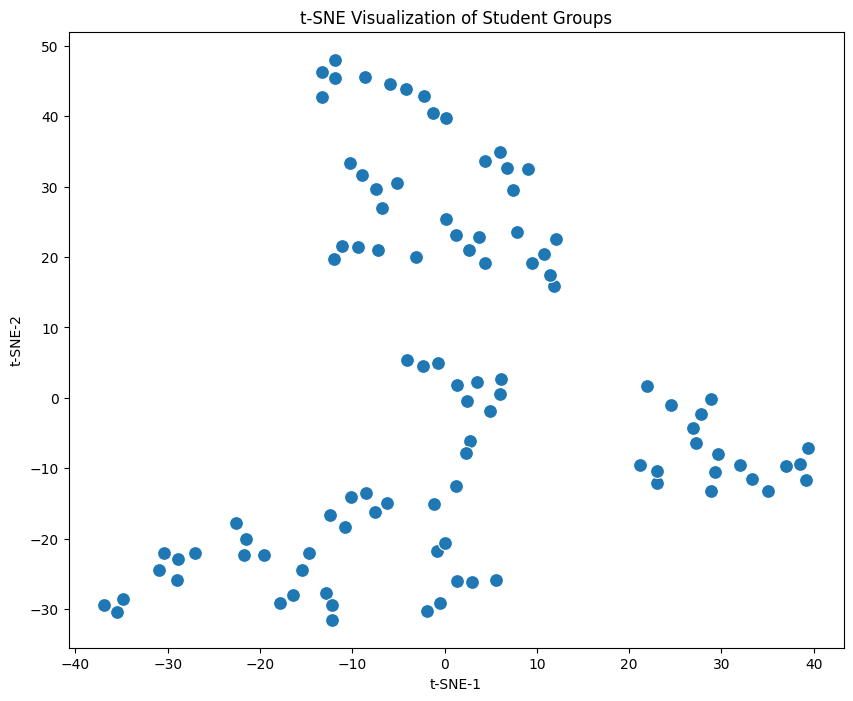

In [49]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Using 2 components for a 2D visualization
X_tsne = tsne.fit_transform(students_df)

# Add t-SNE results to dataframe
students_df['t-SNE-1'] = X_tsne[:, 0]
students_df['t-SNE-2'] = X_tsne[:, 1]

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE-1', y='t-SNE-2', data=students_df, palette='viridis', s=100)
plt.title('t-SNE Visualization of Student Groups')
plt.show()

Epoch 1/50


2025-02-21 14:54:11.480545: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.1843
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1076 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1374 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1160 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1328 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0885 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0666 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0804 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0954 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0426 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9991 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0767 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0027 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0017 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0041 
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

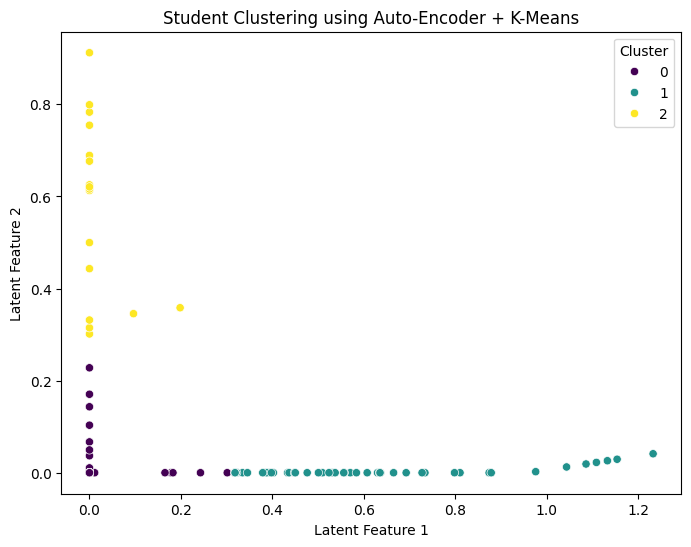

In [61]:
# Standardize the dataset
scaler = StandardScaler()
students_scaled = scaler.fit_transform(students_df)

# Define the Auto-Encoder model
input_dim = students_scaled.shape[1]  # Number of features
encoding_dim = 2  # Latent space dimension for clustering

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(4, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# Decoder
decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Auto-Encoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Auto-Encoder
autoencoder.fit(students_scaled, students_scaled, epochs=50, batch_size=16, shuffle=True, verbose=1)

# Extract the Encoder part
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(students_scaled)

# Apply K-Means clustering on the encoded features
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(encoded_features)

# Add the cluster labels to the dataset
students_df['Cluster'] = clusters

# Save the clustered dataset
students_df.to_csv("Clustered_Students_Dataset.csv", index=False)

# Visualizing the clusters using the encoded features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=encoded_features[:, 0], y=encoded_features[:, 1], hue=clusters, palette='viridis')
plt.title("Student Clustering using Auto-Encoder + K-Means")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.legend(title="Cluster")
plt.show()

In [71]:
students_df['Cluster'] = clusters

students_df[students_df['Cluster'] == 2]

,Age,Mark1,Mark2,Mark3,t-SNE-1,t-SNE-2,Cluster
13,42,81,88,52,-6.768318,26.926867,2
16,43,90,77,31,9.089524,32.451996,2
19,27,61,74,38,0.103622,39.731544,2
26,45,66,85,54,-7.454497,29.655899,2
28,49,51,41,42,-13.281157,42.728268,2
30,43,77,74,36,6.715043,32.659126,2
36,28,68,43,37,-13.319819,46.349255,2
39,33,75,60,44,12.074061,22.611656,2
41,41,55,59,61,-10.280421,33.395363,2
58,41,65,77,37,4.345024,33.580017,2
